This notebook contains all of our ideas for what should be included in the EDA.

In [86]:
#Library Imports --- IGNORE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

from difflib import SequenceMatcher

In [23]:
#Jun - Reading the files
df_exreviews = pd.read_excel(os.path.join("..", "Metacritic dataset", "ExpertReviews.xlsx"))
df_metaclean = pd.read_excel(os.path.join("..", "Metacritic dataset", "metaClean43Brightspace.xlsx"))
df_sales = pd.read_excel(os.path.join("..", "Metacritic dataset", "sales.xlsx"))
df_usreviews = pd.read_excel(os.path.join("..", "Metacritic dataset", "UserReviews.xlsx"))


# 1.1 MetaCritic Data Analysis

Number of rows to columns: (11364, 13)

Number of missing values in dataset:
url              0 (0.0%)
title            0 (0.0%)
studio         350 (3.1%)
rating        1067 (9.4%)
runtime        255 (2.2%)
cast         3702 (32.6%)
director        14 (0.1%)
genre           20 (0.2%)
summary      5897 (51.9%)
awards       6977 (61.4%)
metascore        0 (0.0%)
userscore    2105 (18.5%)
RelDate          0 (0.0%)
dtype: object


,url,title,studio,rating,runtime,cast,director,genre,summary,awards,metascore,userscore,RelDate
0,https://www.metacritic.com/movie/!women-art-re...,!Women Art Revolution,Hotwire Productions,| Not Rated,83.0,NaN,Lynn Hershman-Leeson,Documentary,NaN,NaN,70,NaN,2011-06-01
1,https://www.metacritic.com/movie/10-cloverfiel...,10 Cloverfield Lane,Paramount Pictures,| PG-13,104.0,"John Gallagher Jr.,John Goodman,Mary Elizabeth...",Dan Trachtenberg,"Action,Sci-Fi,Drama,Mystery,Thriller,Horror","Waking up from a car accident, a young woman (...","#18MostDiscussedMovieof2016 , #1MostSharedMovi...",76,7.7,2016-03-11
2,https://www.metacritic.com/movie/10-items-or-less,10 Items or Less,Click Star,| R,82.0,"Jonah Hill,Morgan Freeman,Paz Vega",Brad Silberling,"Drama,Comedy,Romance",While researching a role as a supermarket mana...,NaN,54,5.8,2006-12-01
3,https://www.metacritic.com/movie/10-years,10 Years,Anchor Bay Entertainment,| R,100.0,"Channing Tatum,Chris Pratt,Jenna Dewan",Jamie Linden,"Drama,Comedy,Romance",NaN,NaN,61,6.9,2012-09-14
4,https://www.metacritic.com/movie/100-bloody-acres,100 Bloody Acres,Music Box Films,| Not Rated,91.0,NaN,Cameron Cairnes,"Horror,Comedy",Reg and Lindsay run an organic fertilizer busi...,NaN,63,7.5,2013-06-28


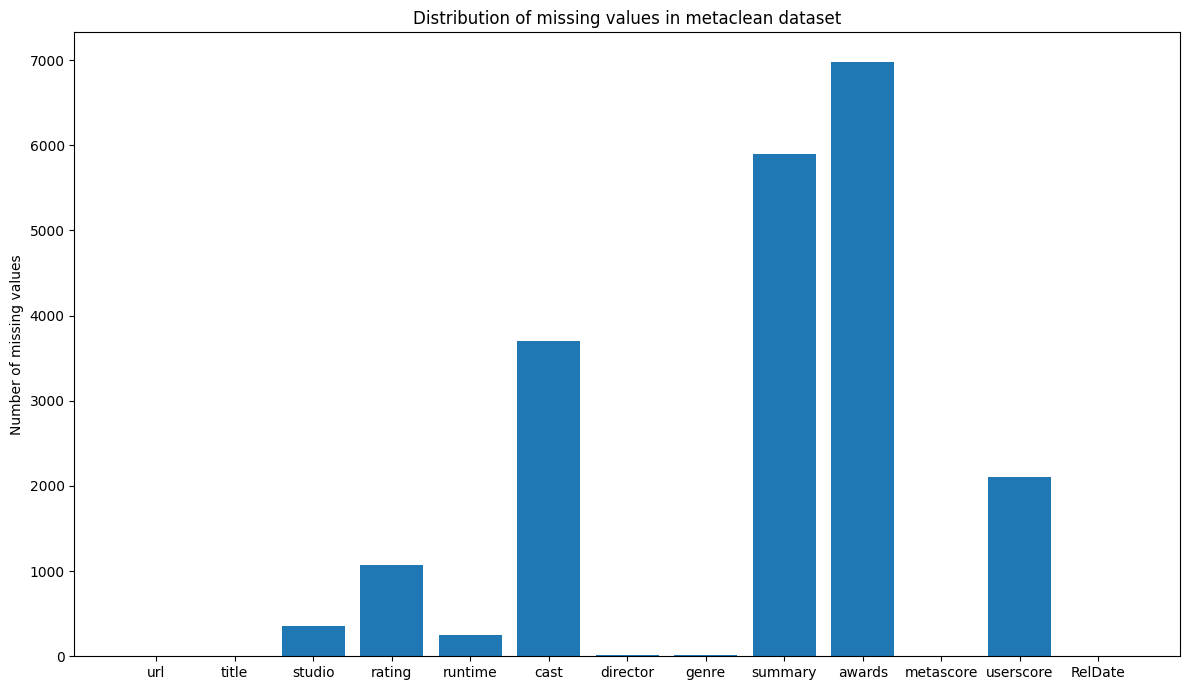

In [57]:
#General number of rows and columns
print("Number of rows to columns:", df_metaclean.shape)
print("")

#Number and percent of missing values
print("Number of missing values in dataset:") 
metaclean_missing_values = df_metaclean.isna().sum()
metaclean_missing_percentage = (df_metaclean.isna().mean() * 100).round(1)
missing_formatted = metaclean_missing_values.astype(str) + " (" + metaclean_missing_percentage.astype(str) + "%)"
print(missing_formatted)

#General shape of dataset
display(df_metaclean.head())

#Plot percentage of missing values per colums
plt.figure(figsize=(12, 7))
plt.bar(metaclean_missing_values.index, metaclean_missing_values)
plt.title("Distribution of missing values in metaclean dataset")
plt.ylabel("Number of missing values")
plt.tight_layout()
plt.show()



In [60]:
df_metaclean.columns.tolist()

['url',
 'title',
 'studio',
 'rating',
 'runtime',
 'cast',
 'director',
 'genre',
 'summary',
 'awards',
 'metascore',
 'userscore',
 'RelDate']

In [95]:
#Check studio, rating and genre for popularity
#Clean genres column
def clean_genre(g):
    if pd.isna(g):
        return np.nan

    #Split based on multiple separators
    parts = re.split(r',|/|\||;| & | - ', g)

    #Strip any whitespaces and remove empty strings
    parts = [p.strip() for p in parts if p.strip() != ""]

    return parts

df_metaclean["clean_genre"] = df_metaclean["genre"].apply(clean_genre)

#Create flat version which contains a single string per movie (based on first genre)
df_metaclean["primary_genre"] = df_metaclean["clean_genre"].apply(
    lambda x: x[0] if isinstance(x, list) and len(x) > 0 else np.nan)

popularity_columns = ["studio", "rating", "primary_genre"]

def rarity_check(df_metaclean, col, rarity_threshold=0.01):
    print(f"\n===== {col.upper()} =====")

    #Popularity counts and percentages
    popularity_count = df_metaclean[col].value_counts(dropna=True)
    popularity_percentage = (
        df_metaclean[col].value_counts(normalize=True, dropna=True) * 100).round(2)

    #Print summary
    popularity_summary = pd.DataFrame({"Rarity count": popularity_count, "Percentage": popularity_percentage})
    print(popularity_summary)

    #Detect rare categories
    rare = popularity_summary[popularity_summary["Percentage"] < (rarity_threshold * 100)]
    print("\n===== Rare Categories (<1%) =====")
    print(rare if not rare.empty else "None")

    return popularity_summary, rare

#Run rarity check again
categorical_profiles = {}
for col in popularity_columns:
    categorical_profiles[col] = rarity_check(df_metaclean, col)



===== STUDIO =====
                                         Rarity count  Percentage
studio                                                           
IFC Films                                         408        3.70
Universal Pictures                                345        3.13
Sony Pictures Classics                            344        3.12
Warner Bros. Pictures                             302        2.74
Netflix                                           301        2.73
...                                               ...         ...
Mill Creek Entertainment                            1        0.01
American International Pictures                     1        0.01
Dartmouth Films                                     1        0.01
Fox Lorber Home Video                               1        0.01
20th Century Fox International Classics             1        0.01

[1118 rows x 2 columns]

===== Rare Categories (<1%) =====
                                         Rarity count  Percent

,metascore,userscore
count,11364.000000,9259.000000
mean,58.392555,6.542672
std,16.898457,1.374956
min,1.000000,0.200000
25%,47.000000,5.800000
50%,60.000000,6.700000
75%,71.000000,7.500000
max,100.000000,9.700000


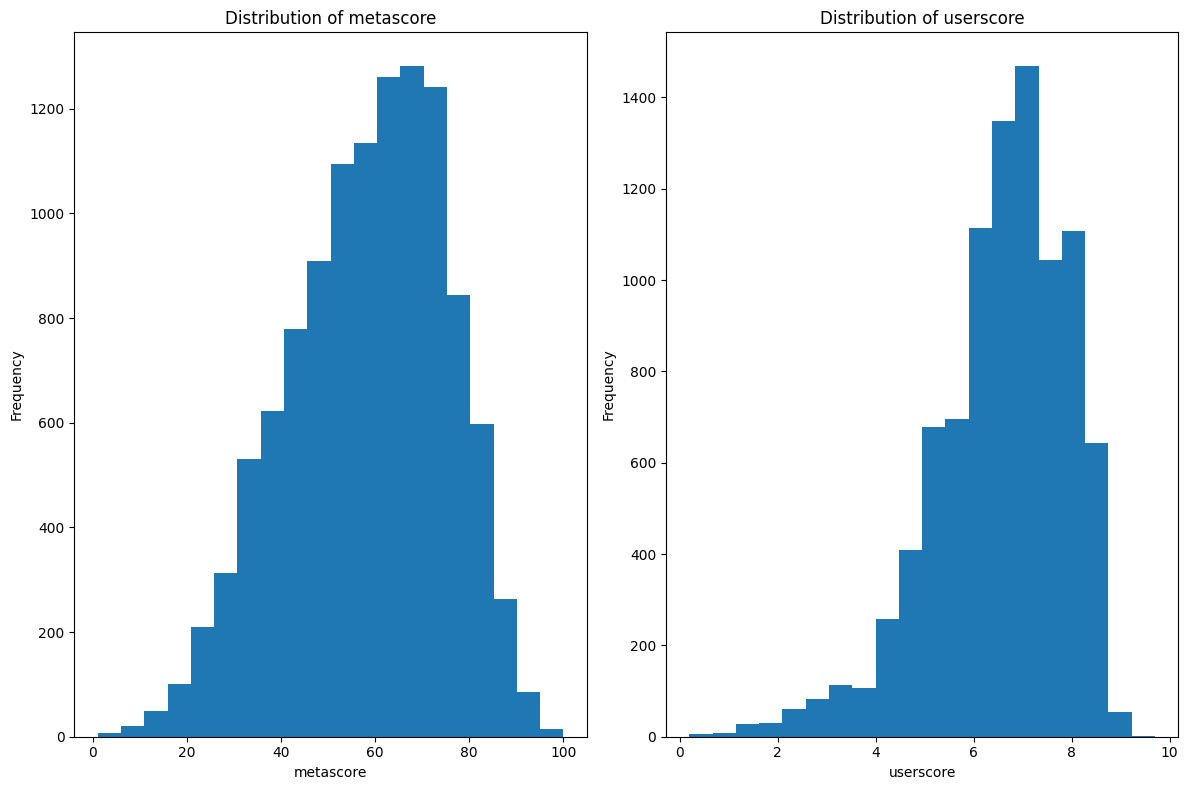

In [ ]:
#Distribution of scores
score_columns = ["metascore", "userscore"]
display(df_metaclean[score_columns].describe())

#Plot histogram for meta and userscores
plt.figure(figsize=(12,8))

for i, col in enumerate(["metascore", "userscore"], 1):
    plt.subplot(1, 2, i)
    plt.hist(df_metaclean[col].dropna(), bins=20)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [85]:
#Check for duplicated movie url
duplicate_urls = df_metaclean[df_metaclean["url"].duplicated(keep=False)].sort_values("url")

print("Duplicate URLs:")
print(duplicate_urls if not duplicate_urls.empty else "None\n")

#Check for duplicated movie title
duplicate_titles = df_metaclean[df_metaclean["title"].duplicated(keep=False)].sort_values("title")

print("Duplicate Titles:")
print(duplicate_titles if not duplicate_titles.empty else "None\n")

#Check for near identical matches for movie titles
unique_title = df_metaclean["title"].dropna().unique()

similar_titles = []
threshold = 0.95        #Threshold for strictness (0-1)

for i, t1 in enumerate(unique_title):
    for j in range(i + 1, len(unique_title)):
        t2 = unique_title[j]

        #Filter for if length is very high
        if abs(len(t1) - len(t2)) > 10:
            continue
    
        ratio = SequenceMatcher(None, t1, t2).ratio()
        if ratio >= threshold:
            similar_titles.append((t1, t2, ratio))

similar_titles_df = pd.DataFrame(similar_titles, columns=["title 1", "title 2", "Similarity"])
print(f"Found {len(similar_titles_df)} similar title pairs with similarity => {threshold}")
display(similar_titles_df.head())

Duplicate URLs:
None

Duplicate Titles:
                                                     url            title  \
215     https://www.metacritic.com/movie/a-family-affair  A Family Affair   
216    https://www.metacritic.com/movie/a-family-affa...  A Family Affair   
422                https://www.metacritic.com/movie/adam             Adam   
423           https://www.metacritic.com/movie/adam-2019             Adam   
451               https://www.metacritic.com/movie/after            After   
...                                                  ...              ...   
11227   https://www.metacritic.com/movie/wrong-turn-2021       Wrong Turn   
11311             https://www.metacritic.com/movie/youth            Youth   
11312        https://www.metacritic.com/movie/youth-2017            Youth   
11360              https://www.metacritic.com/movie/zoom             Zoom   
11361         https://www.metacritic.com/movie/zoom-2016             Zoom   

                             studio

,title 1,title 2,Similarity
0,American Animal,American Animals,0.967742
1,Cheaper by the Dozen,Cheaper by the Dozen 2,0.952381
2,City of God,City of Gold,0.956522
3,Cloudy with a Chance of Meatballs,Cloudy with a Chance of Meatballs 2,0.970588
4,Collateral Damage,Collateral Damages,0.971429


In [ ]:
# Rosie - Lowercase, trim, remove special characters
# df1


def clean_text_column(text):
    if isinstance(text, str):
        text = text.lower()                      # lowercase
        text = text.strip()                      # remove spaces at start/end
        text = re.sub(r'[^a-z0-9\s]', '', text)  # remove special characters
    return text
for col in df1.columns:
    df1[col] = df1[col].apply(clean_text_column)
for col in df2.columns:
    df2[col] = df2[col].apply(clean_text_column)  
for col in df3.columns:
    df3[col] = df3[col].apply(clean_text_column)  
for col in df4.columns:
    df4[col] = df4[col].apply(clean_text_column)



In [ ]:
#Rosie - number of rows and columns in df3
print("There are {} rows and {} columns in UserReviews".format(df3.shape[0], df3.shape[1]))
print("There are {} rows and {} columns in ExpertReviews".format(df4.shape[0], df4.shape[1]))

In [ ]:
# Rosie - a quick overview of the dataset by looking at the first and last few rows df3
df3.head()
df3.tail()

In [ ]:
# Rosie - a quick overview of the dataset by looking at the first and last few rows df4
df4.head()
df4.tail()

In [ ]:
# Rosie - check the unique df3
print("Is URL column unique? :", df3['url'].is_unique)
print("Number of duplicate URLs:", df3['url'].duplicated().sum())
print("Number of unique URLs   :", df3['url'].nunique())
print("Total number of rows    :", df3.shape[0])

print("Is URL column unique? :", df3['reviewer'].is_unique)
print("Number of duplicate URLs:", df3['reviewer'].duplicated().sum())
print("Number of unique URLs   :", df3['reviewer'].nunique())
print("Total number of rows    :", df3.shape[0])


In [ ]:
# Rosie - check the unique df4
print("Is URL column unique? :", df4['url'].is_unique)
print("Number of duplicate URLs:", df4['url'].duplicated().sum())
print("Number of unique URLs   :", df4['url'].nunique())
print("Total number of rows    :", df4.shape[0])

print("Is URL column unique? :", df4['reviewer'].is_unique)
print("Number of duplicate URLs:", df4['reviewer'].duplicated().sum())
print("Number of unique URLs   :", df4['reviewer'].nunique())
print("Total number of rows    :", df4.shape[0])

In [ ]:
# Rosie - missing values df3
n_nulls_df3 = df3.loc[lambda x: x.isnull().any(axis=1)].shape
print(f"There are {n_nulls_df3[0]} rows with missing values in df3")
df3.isna().sum()
# 1. Drop rows missing review text
df3 = df3.dropna(subset=['Rev']).copy()

# 2. Fill missing reviewer names
df3.loc[:, 'reviewer'] = df3['reviewer'].fillna('unknown_reviewer')

# 3. Fill missing score only if needed
# df3.loc[:, 'idvscore'] = df3['idvscore'].fillna(-1)  # or drop them if needed

# 4. Replace missing thumbsUp and thumbsTot with 0
df3.loc[:, 'thumbsUp'] = df3['thumbsUp'].fillna(0)
df3.loc[:, 'thumbsTot'] = df3['thumbsTot'].fillna(0)

In [ ]:
#  Rosie - Check missing values 
n_nulls_df4 = df4.loc[lambda x: x.isnull().any(axis=1)].shape
print(f"There are {n_nulls_df4[0]} rows with missing values in df4")

print("\nMissing values per column before cleaning:")
print(df4.isna().sum())

#  Drop rows where review text is missing 
df4 = df4.dropna(subset=['Rev']).copy()

#  Fill optional missing values 

df4.loc[:, 'reviewer'] = df4['reviewer'].fillna('unknown_reviewer')

# Missing date 
df4.loc[:, 'dateP'] = df4['dateP'].fillna('unknown_date')

# Check again after cleaning
print("\nMissing values per column after cleaning:")
print(df4.isna().sum())


In [ ]:
# Iro - Clean column names from sales 
sales.columns = (
    sales.columns
    .str.lower()
    .str.strip()
    .str.replace(" ", "_") 
    .str.replace(r"[^0-9a-z_]", "", regex=True)
)
sales.columns

In [ ]:
# Iro - Clean text column from sales 
text_cols = ["title", "genre", "keywords", "creative_type", "url"]

for col in text_cols:
    if col in sales.columns:
        sales[col] = (
            sales[col].astype(str)
            .str.lower()
            .str.strip()
        )

In [ ]:
# Iro - Convert numeric columns
num_cols = [
    "domestic_box_office", "international_box_office", "worldwide_box_office",
    "production_budget", "opening_weekend", "theatre_count",
    "avg_run_per_theatre", "runtime", "year"
]

for col in num_cols:
    if col in sales.columns:
        sales[col] = pd.to_numeric(sales[col], errors="coerce")

In [ ]:
# Iro - Missing value summary
sales.isna().sum() # how many missing values each column has

Data quality:
- production_budget → 26,132 missing
- domestic_box_office → 18,728 missing
- international_box_office → 9,037 missing
- unnamed_8 → 30,612 missing 

Usable columns:
- year, title, genre → 0 missing 
- runtime → 6,053 missing

In [ ]:
# Iro - Plot sales distributions
cols = ["domestic_box_office", "international_box_office", "worldwide_box_office"]
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

notation = (
    "Axis meaning:\n"
    "0   →   0\n"
    "0.5 → 500M\n"
    "1.0 → 1B\n"
    "2.0 → 2B"
)

for ax, col in zip(axes, cols):
    if col in sales.columns:
        _ = ax.hist(sales[col].dropna(), bins=40)
        _ = ax.set_title(col.replace("_", " ").title())
        _ = ax.set_xlabel("Sales (USD)")
        _ = ax.set_ylabel("Frequency")

        # suppress printed return value
        _ = ax.text(
            0.98, 0.98,
            notation,
            transform=ax.transAxes,
            fontsize=8,
            ha='right',
            va='top',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7)
        )

plt.tight_layout()
plt.show()


**Interpretation of the Box Office Histograms**

The three histograms (Domestic, International, and Worldwide Box Office) show how movie revenues are distributed.
- The x-axis represents sales in USD, but very large values are shown in compressed scientific notation. The legend explains that values like 0.5, 1.0, 2.0 actually correspond to 500M, 1B, and 2B USD.
- The y-axis, labeled Frequency, indicates how many movies fall into each revenue range (bin). A higher bar means more movies in that sales interval.

Across all three charts, the very tall bar near zero shows that most movies earn very little revenue, while only a small number reach hundreds of millions or billions. This creates a long right tail, indicating that box office revenues are extremely skewed, with many low-earning films and a few very high-earning blockbusters.